In [5]:
import os
print(os.getcwd())

/Users/libowen/SD3rd/RP/code/auto_split/400 turbines/analysis


/var/folders/rx/y63trwp10b9dm1lbhqqv7_rw0000gn/T/ipykernel_69360/3477590192.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', n_clusters)


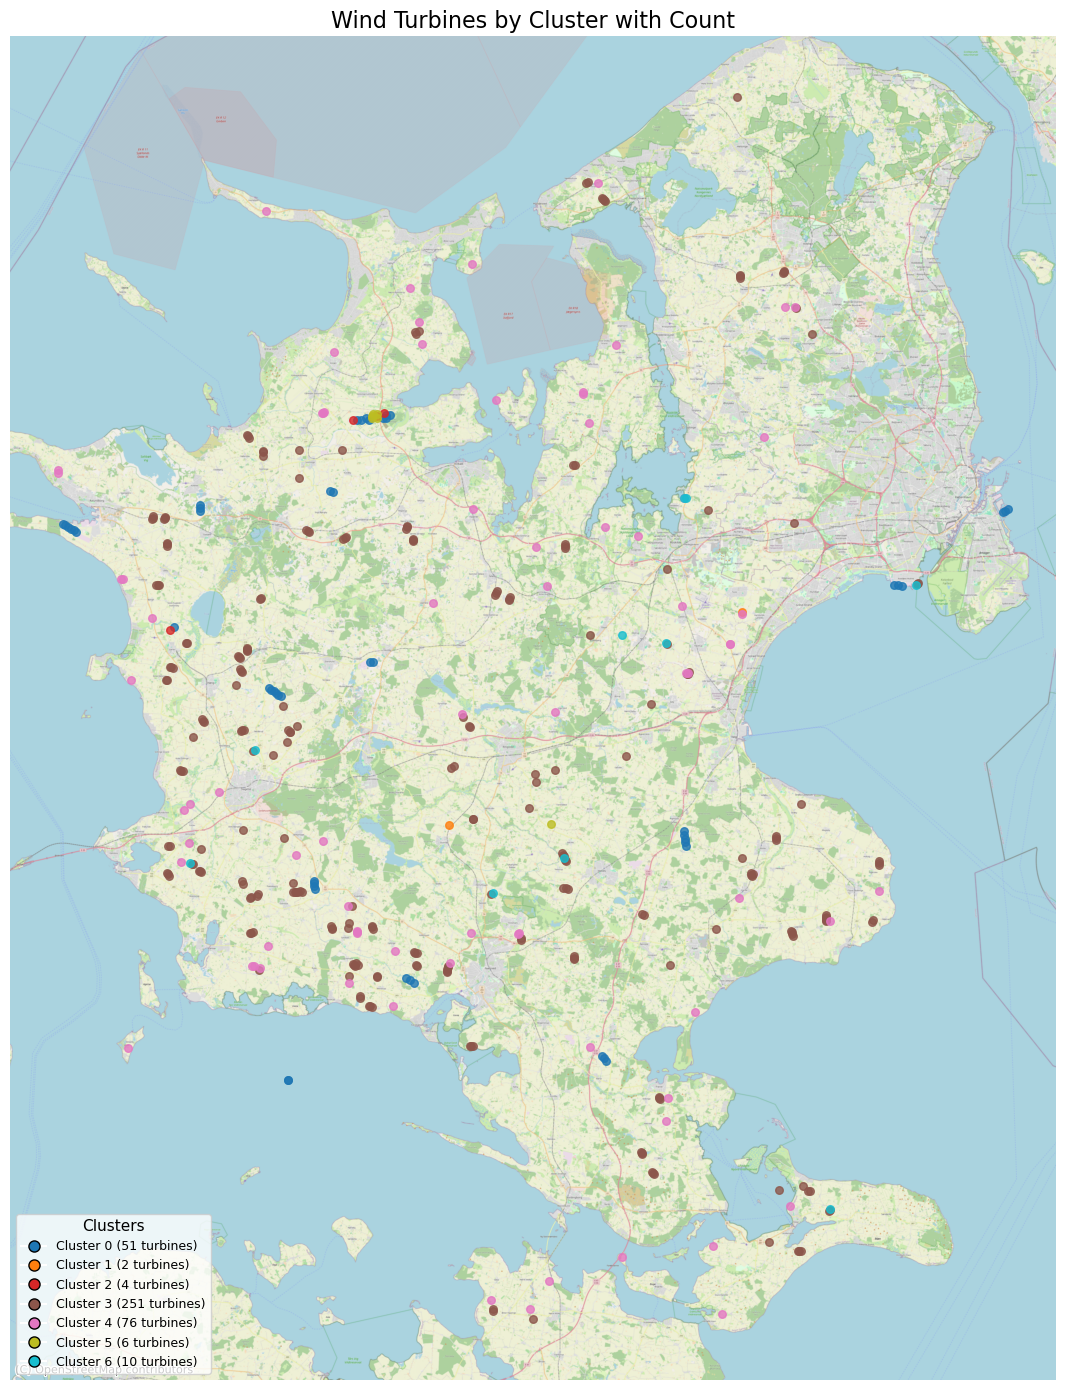

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import ast
import random
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

# --- read cluster data and expand GSRN list ---
cluster_df = pd.read_csv("./cluster_turbine_ids.csv")
exploded_rows = []

for _, row in cluster_df.iterrows():
    cluster_id = row['Cluster']
    gsrn_list = ast.literal_eval(row['GSRN'])
    for gsrn in gsrn_list:
        exploded_rows.append({'Cluster': cluster_id, 'GSRN': int(gsrn)})

expanded_df = pd.DataFrame(exploded_rows)

# --- merge coordinate data ---
raw_df = pd.read_csv("../selected turbines/selected_400_turbines_filtered.csv")
merged = expanded_df.merge(
    raw_df[["GSRN", "UTM_x", "UTM_y"]],
    on="GSRN", how="inner"
)

# --- transform to GeoDataFrame ---
gdf = gpd.GeoDataFrame(
    merged,
    geometry=gpd.points_from_xy(merged["UTM_x"], merged["UTM_y"]),
    crs="EPSG:25832"
).to_crs(epsg=3857)

# --- set color mapping ---
n_clusters = gdf["Cluster"].nunique()
colors = cm.get_cmap('tab10', n_clusters)
cluster_ids = sorted(gdf["Cluster"].unique())
cluster_color_map = {c: mcolors.to_hex(colors(i)) for i, c in enumerate(cluster_ids)}

# --- plot ---
fig, ax = plt.subplots(figsize=(14, 14))

legend_elements = []

for i, (cluster_id, group) in enumerate(gdf.groupby("Cluster")):
    group.plot(
        ax=ax,
        color=cluster_color_map[cluster_id],
        markersize=30,
        label=f"Cluster {cluster_id} ({len(group)} turbines)",
        alpha=0.8,
        edgecolor=cluster_color_map[cluster_id] 
    )

    # optional: add GSRN labels (last 4 digits)
    # for idx, row in group.iterrows():
    #     dx, dy = random.randint(-300, 300), random.randint(-300, 300)
    #     ax.text(
    #         row.geometry.x + dx,
    #         row.geometry.y + dy,
    #         str(row["GSRN"])[-4:], fontsize=6, weight='bold'
    #     )

    # add legend element
    legend_elements.append(
        Line2D(
            [0], [0],
            marker='o',
            color='w',
            label=f"Cluster {cluster_id} ({len(group)} turbines)",
            markerfacecolor=cluster_color_map[cluster_id],
            markeredgecolor='black',
            markersize=8
        )
    )

# add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# set title and legend
ax.set_title("Wind Turbines by Cluster with Count", fontsize=16)
ax.axis("off")
ax.legend(
    handles=legend_elements,
    loc="lower left",
    title="Clusters",
    fontsize=9,
    title_fontsize=11,
    frameon=True
)

# save figure
# plt.savefig("cluster_map_with_count.png", dpi=300)

plt.tight_layout()
plt.show()

/var/folders/rx/y63trwp10b9dm1lbhqqv7_rw0000gn/T/ipykernel_69360/3424791391.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', n_clusters)


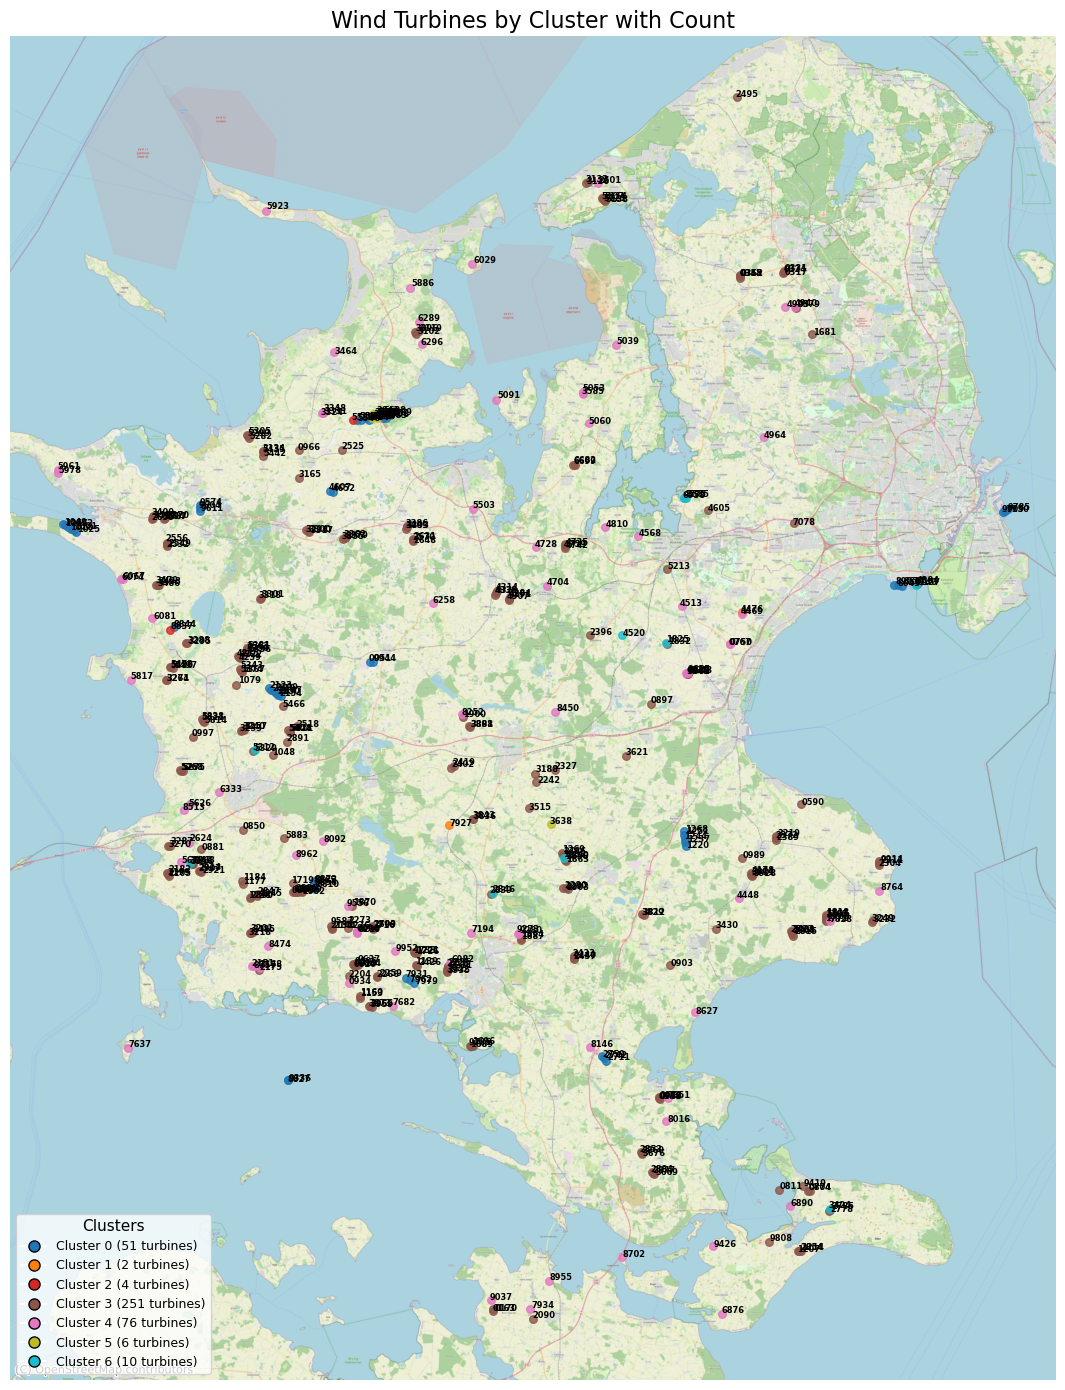

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import ast
import random
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

# --- read cluster data and expand GSRN list ---
cluster_df = pd.read_csv("./cluster_turbine_ids.csv")
exploded_rows = []

for _, row in cluster_df.iterrows():
    cluster_id = row['Cluster']
    gsrn_list = ast.literal_eval(row['GSRN'])
    for gsrn in gsrn_list:
        exploded_rows.append({'Cluster': cluster_id, 'GSRN': int(gsrn)})

expanded_df = pd.DataFrame(exploded_rows)

# --- merge coordinate data ---
raw_df = pd.read_csv("../selected turbines/selected_400_turbines_filtered.csv")
merged = expanded_df.merge(
    raw_df[["GSRN", "UTM_x", "UTM_y"]],
    on="GSRN", how="inner"
)

# --- transform to GeoDataFrame ---
gdf = gpd.GeoDataFrame(
    merged,
    geometry=gpd.points_from_xy(merged["UTM_x"], merged["UTM_y"]),
    crs="EPSG:25832"
).to_crs(epsg=3857)

# --- set color mapping ---
n_clusters = gdf["Cluster"].nunique()
colors = cm.get_cmap('tab10', n_clusters)
cluster_ids = sorted(gdf["Cluster"].unique())
cluster_color_map = {c: mcolors.to_hex(colors(i)) for i, c in enumerate(cluster_ids)}

# --- plot ---
fig, ax = plt.subplots(figsize=(14, 14))

legend_elements = []

for i, (cluster_id, group) in enumerate(gdf.groupby("Cluster")):
    group.plot(
        ax=ax,
        color=cluster_color_map[cluster_id],
        markersize=30,
        label=f"Cluster {cluster_id} ({len(group)} turbines)",
        alpha=0.8,
        edgecolor=cluster_color_map[cluster_id] 
    )

    # optional: add GSRN labels (last 4 digits)
    for idx, row in group.iterrows():
        dx, dy = random.randint(-300, 300), random.randint(-300, 300)
        ax.text(
            row.geometry.x + dx,
            row.geometry.y + dy,
            str(row["GSRN"])[-4:], fontsize=6, weight='bold'
        )

    # add legend element
    legend_elements.append(
        Line2D(
            [0], [0],
            marker='o',
            color='w',
            label=f"Cluster {cluster_id} ({len(group)} turbines)",
            markerfacecolor=cluster_color_map[cluster_id],
            markeredgecolor='black',
            markersize=8
        )
    )

# add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# set title and legend
ax.set_title("Wind Turbines by Cluster with Count", fontsize=16)
ax.axis("off")
ax.legend(
    handles=legend_elements,
    loc="lower left",
    title="Clusters",
    fontsize=9,
    title_fontsize=11,
    frameon=True
)

# save as high-resolution PNG (optional)
# plt.savefig("cluster_map_with_count.png", dpi=300)

plt.tight_layout()
plt.show()